# Retirement Tool

By Eial Kestelman

Please reach out with any feedback!

[Click](#scrollTo=Introduction) to show the introduction and usage guide. See [disclaimer](#scrollTo=Please_note_).



## Introduction

This is a tool to facilitate retirement investments choices. Specifically, it tackles the problem of choosing between a traditional (pre-tax) or Roth (post-tax) account. See [Taxes](#scrollTo=Taxes) for more details on the problem that this program addresses.

The program will produce a graph allowing us to explore two strategies: you may contribute first to a Roth account for $x$ years before switching to traditional for the remainder of your career, or you may contribute first to a traditional account for $x$ years and then switch to Roth for the remaining years. We will be able to compare the two strategies, and determine when you should switch between the two account types.

See the [Explanations](#scrollTo=Explanations) section for more information on interpreting results and how the code works.

## Usage

Follow the instructions below to use the tool. You will need to run 1 or 2 code cells for an initial setup, after which you will be prompted to input some values that affect the results of the program. Then run the program to see the results.

You can also run all (Runtime > Run all) but you only need to rerun the last code cell if you choose to change your inputs.

To run a cell (or group of cells) press the play button on the left of the cell.

For explanations about inputs, see [Understanding the Inputs](#scrollTo=Understanding_the_Inputs).

# Setup

Run the cell below to import the necessary Python libraries and modules from my [Github repository](https://github.com/ekestelman/retirement-plans).

You only need to run this cell once.

In [1]:
# @title
!git clone https://github.com/ekestelman/retirement-plans.git
%cd "retirement-plans"

import ipywidgets as widgets
import sys
import main

Cloning into 'retirement-plans'...
remote: Enumerating objects: 199, done.
remote: Counting objects: 100% (199/199), done.
remote: Compressing objects: 100% (137/137), done.
remote: Total 199 (delta 123), reused 133 (delta 62), pack-reused 0
Receiving objects: 100% (199/199), 59.79 KiB | 2.85 MiB/s, done.
Resolving deltas: 100% (123/123), done.
/content/retirement-plans


# Choose Variables

Run the cell below and input the desired values.

You only need to run this cell once, even if you change your inputs. Rerunning the cell will reset variables to default values.

Confused about inputs? See [Understanding the Inputs](#scrollTo=Understanding_the_Inputs).

In [2]:
# @title
sys.argv.append("ex")
default_dict = main.get_vals(True)
var_dict = {x: None for x in default_dict}
del var_dict["normalize"]  # "normalize" is deprecated
for x in var_dict:
  if x in ["age", "ret age", "life"]:  # These need to be ints
    var_dict[x] = widgets.BoundedIntText(description=x, min=14, max=120)
  else:
    if x in ["cont", "match"]:   # These need to be floats
      min, max, step = 0, 0.5, 0.01
    elif "apy" in x:    # Is this slower?
      min, max, step = 0, 10, 0.01   # Misleading to have it reach 10? Maybe cap at 2?
    elif ("sal" in x) or (x in ["bal", "pension"]):   # Can be int or float
      min, max, step = 0, 1e7, 100    # Remove max? (also in apy?)
    var_dict[x] = widgets.BoundedFloatText(description=x, min=min, max=max, step=step)
  var_dict[x].value = default_dict[x]

print("Enter your desired values\n")

for x in var_dict:
  display(var_dict[x])

Enter your desired values



BoundedFloatText(value=60000.0, description='start sal', max=10000000.0, step=100.0)

BoundedFloatText(value=90000.0, description='end sal', max=10000000.0, step=100.0)

BoundedFloatText(value=1.06, description='apy', max=10.0, step=0.01)

BoundedFloatText(value=0.05, description='cont', max=0.5, step=0.01)

BoundedFloatText(value=1.01, description='ret apy', max=10.0, step=0.01)

BoundedIntText(value=25, description='age', max=120, min=14)

BoundedIntText(value=65, description='ret age', max=120, min=14)

BoundedIntText(value=95, description='life', max=120, min=14)

BoundedFloatText(value=0.0, description='bal', max=10000000.0, step=100.0)

BoundedFloatText(value=25000.0, description='pension', max=10000000.0, step=100.0)

BoundedFloatText(value=0.03, description='match', max=0.5, step=0.01)

# Run Program

Run the cell below to run the program using the chosen values. To rerun the program with new values, simply change the values above as desired, then rerun the cell below.

------------------------  ----------  ----------  ----------
                          Roth first  Trad first  Difference
Best year to change:      30          0
Best retirement income:   55519       55506       12
Worst retirement income:  53015       53015
Best - Worst:             2503        2491
------------------------  ----------  ----------  ----------
Yearly trad withdrawal (pretax): 21571 or 18254

Using the Roth first strategy, it is best to switch to traditional
after 30 years. Your retirement income (after paying taxes) will be
55519. Each year of retirement you should withdraw 21571 (before
taxes) from your traditional account.

Using the traditional first strategy, it is best to switch to Roth
after 0 years. Your retirement income (after paying taxes) will be
55506. Each year of retirement you should withdraw 18254 (before
taxes) from your traditional account.



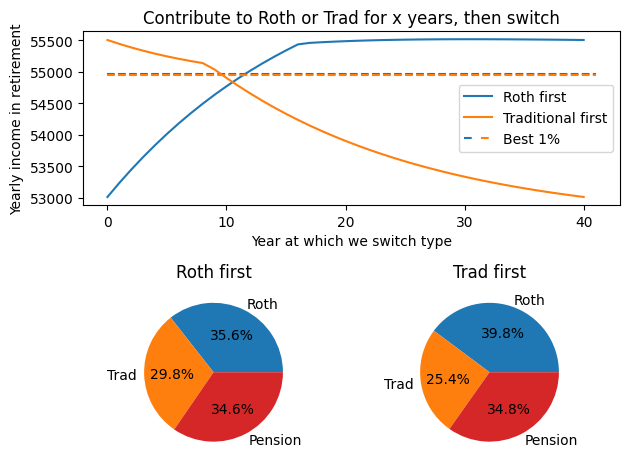

In [3]:
# @title
val_dict = {x: var_dict[x].value for x in var_dict}
main.main(val_dict)

# Explanations

## Overview

The key concept behind this program is that, because a traditional contribution is tax deductible, you can contribute more to a traditional account than to a Roth account without having any impact on your other finances. For more details on this, see [Taxes](#scrollTo=Taxes).

[More](#scrollTo=Understanding_the_Plot)

## Understanding the Plot

The plot shows yearly retirement income plotted against switch year. For example, at $x=5$, the Roth first graph shows your retirement income if you were to contribute to a Roth account for the next 5 years before switching to traditional for the rest of your career.

Note that at $x=0$, the Roth first graph represents only ever contributing to a traditional account (because you would be switching to traditional immediately, or after 0 years). Similarly, at $x=0$ the traditional first graph represents only ever contributing to Roth. At $x_{\max}$, the Roth first and traditional first graphs represent always contributing to Roth or traditional respectively.

The maximum of each graph shows the best time to switch from one account type to the other in order to maximize your retirement income. By comparing the two maxima, you can determine which strategy is best. Note that in some cases, one strategy may produce a higher but narrower peak. It may be worth considering whether the narrow peak is worth gambling on, or whether it is best to choose the strategy with a broader peak.

Income shown on the *y*-axis is after taxes, so you can compare strategies regardless of whether most funds are coming from a Roth or traditional account. The pie charts show the breakdown of your funds for each strategy in the case that you switch at the optimal time. If the best strategy is to always contribute to the same account, the two pie charts will be the same.

The yearly trad withdrawal tells you how much you should take out of your traditional account (before taxes) each year in retirement for the Roth first and traditional first strategies respectively (assuming you switch at the optimal time).



## Understanding the Inputs

`start sal` is your current salary.

`end sal` is you projected salary before you retire. Projected salaries for each year are filled in linearly from `start sal` to `end sal`.

`apy` is your expected yearly returns on investments while working. If you expect $10\%$ returns, you should input `1.1`. Inputting `10` would represent a $1000\%$ yearly ROI, while inputting `0.1` would represent a devaluation of $90\%$.

`cont` is your desired contribution to a Roth account, expressed as a fraction of your gross (pre-tax) income. If you want to contribute $10\%$ of your income each year, you should input `0.1`. Traditional contributions will be calculated by the program (see [Taxes](#scrollTo=Taxes)).

`ret apy` is your expected yearly returns in retirement. You may choose a lower amount than `apy` if you expect to transition to a more conservative portfolio. You should input this value in the same way that you input `apy`.

`age` is your current age.

`ret age` is your expected retirement age.

`life` is your life expectancy. It is often recommended to overestimate this because life expectancy has high variance, and we want to avoid running out of money.

`bal` is your current traditional (pre-tax) balance. If you already have any funds in a pre-tax account, you should include it here as this will affect your taxes in retirement, and thus impact the results of the program. `bal` should not include funds from any other accounts.

`pension` is any taxable permanent income you will receive in retirement. This should include any employee pension, as well as the taxable portion of your anticipated social security benefits.

`match` is your employer match, expressed as a fraction of your salary. You should input this value the same way that you input `cont`. Note that there are different ways employers can match contributions, but only one is currently supported by the program: where their match is equal to your contribution, up until some limit. `match` sets this limit. That is, if you set `cont` to $0.05$ and `match` to $0.03$, this represents an employer contribution of $3\%$ of your salary. If instead you set `cont` to $0.03$ and `match` to $0.05$, this still represents an employer contribution of $3\%$. While more options may be available in the future, the choice of this implementation was to showcase the significance of maxing out the employer match.

## Inflation

To account for inflation and get results in present (not inflated) dollars, subtract the expected yearly inflation rate from your expected yearly rate of returns. That is, if you expect $10\%$ yearly returns and $3\%$ yearly inflation, you should set `apy` to $1.1 - 1.03 = 1.07$. See [More on Inflation](#scrollTo=More_on_Inflation) for details.

You may also choose not to make this adjustment if you wish to see results in future (inflated) dollars.

Check back soon for updates on how the code handles inflation!

# Elaborations

[Click](#scrollTo=Simulation_Overview) to show more details on how the code works and some of the math involved. Check back for future updates to see proofs and examples for the claims made in this section.

## Simulation Overview

The code assumes that each year, all retirement contributions go to either a Roth account or a traditional account (i.e., not a combination of both). See [Private Brokerage Account](#scrollTo=Private_Brokerage_Account) for the exception to this rule. Please note that the distinction between Roth and traditional accounts is independent of the distinction between employer-sponsored accounts (such as a 401k) and IRAs. Many employers offer a choice between a traditional and a Roth 401k. It is the choice between these two options that the program helps to assess. If you do not have access to these options, the results of the program may be less accurate (see [Contribution Limits](#scrollTo=Contribution_Limits)).

Returns on investments depend on when the investments were made. For simplicity, the code treats your contributions for one year as a single lump sum invested at the end of each year. The code also treats retirement distributions as if they were single lump sum withdrawals made at the end of each year. Mathematically, this is equivalent to treating investmenets and withdrawals as lump sums occuring at the middle of each year. Although this may be unrealistic, it is a pretty good approximation for making monthly investments and withdrawals.

## Taxes

The code uses 2023 guidelines for federal, New York State, and New York City income tax. Other locations may be supported in the future.

### Comparison of Account Types

The benefit of a Roth account is that you will not owe any taxes on distributions made in retirement.

The benefit of a traditional account is that you get a tax break now, which means you can contribute more money to retirement than you could have if you contributed to a Roth account instead.

The question that this code attempts to answer is whether the additional amount we can contribute with traditional is worth it, noting that the more we put towards traditional, the more taxes we will pay in retirement.

A common suggestion is that if you expect to be in a higher income bracket in retirement, you may benefit from Roth, while if you expect to be in a lower income bracket, you may benefit from traditional. This is a decent rule of thumb, but I conjecture that if you expect to be in a higher bracket, you would *definitely* benefit from Roth, while if you expect to be in a lower bracket, you *may* still benefit from Roth. The reason is that when you contribute more to a traditional account, not only will you owe taxes on those funds in the future, but you also increase your tax liability for all your other traditional funds (past and future) as well as any taxable pension or social security benefits you may have.

### Traditional Contributions

The `cont` input in the program represents how much you would be willing to contribute to a Roth account (where you would get no tax break). If instead you were to contribute to a traditional account, where you would get a tax break, you could contribute more money without any impact to your other finances (i.e., you could contribute more to a traditional account, and because you would owe less in taxes, you would still have the same amount of money left over).

How much more can you put towards retirement if you choose traditional instead of Roth? First let's consider how much money is saved by contributing to traditional. If your effective tax rate is $t$ and your desired Roth contribution is $R$, then you would save $Rt$ by contributing $R$ into traditional. Clearly you could take that $Rt$ and put it towards retirement as well, but then you would save another $Rtt$ which could again be contributed, and so on. The result is the geometric series

$$ \sum_{n=0}^\infty Rt^n = \frac{R}{1-t}. $$

Hence if your desired Roth contribution is $R$, then your traditional contribution should be $\frac{R}{1-t}$.

In fact, because $t$ is a function of income and your taxable income is lower after making a traditional contribution, you will actually have a bit more money left over after contributing $\frac{R}{1-t}$ to traditional than if you only contributed $R$ to Roth. On the other hand, this left over money will probably only be realized after receiving a tax return (or owing less when you pay your taxes). Due to tax withholdings on your income, you may not have as much money left over during the year, but the amounts will balance out by tax season.

### FICA

While traditional retirement contributions are deducted for the purposes of income taxes, they are not deducted for the purposes of FICA. My code does not yet account for this, but in most cases it does not matter. This is because retirement income (e.g., retirement distributions, pensions) are not subject to FICA, as FICA is a payroll tax. My code does not account for this either, and two wrongs make a right (unless your income is above a certain threshold that changes FICA rates).

## Contribution Limits

Contribution limits are set to the 2023 limit for employer sponsored retirement accounts, such as 401k, 403b, or TSP. If you are not able to contribute to such an account (e.g., you are only able to contribute to an IRA), the results of the program may be less accurate. However, if your potential traditional contributions are below the IRA limit ($6,500 for most people) then the program will work properly.

The reason for using the 401k limit and not considering that IRA limit is that only people who earn below a certain amount are eligible to contribute to an IRA. Hence, it is unlikely that someone is both maxing out their 401k and is eligible to contribute to an IRA. If this edge case applies to you, the program may be less accurate.

Note that you may not be able to make lump sum contributions to employer sponsored accounts: the way the program computes this is for simplicity, but keep in mind that these contributions may have to be deducted directly from your paycheck.

## More on Inputs

### Pension

If including anticipated social security in this field, you should only include the taxable portion. For some people, only 50% of their social security benefits are taxable. That does not mean that you are taxed 50% of your benefit amount. Rather that only 50% of your benefit is subject to income taxes. The fraction of your benefit that is taxable depends on your income. For now it is up to you to estimate your benefit amount and how much is taxable (the program will determine the tax rate).

### Match

Employer matches always go towards a traditional account, even if your contribution was to a Roth account. This means it is possible to have a nonzero traditional balance even if you never contribute to a traditional account.

## Private Brokerage Account

In the case that the traditional contribution increase puts you over the contribution limit, the program allows for the possibility of contributing the excess amount into a private brokerage account. However, because this investmenet is not tax deductible, we lose the benefit of the geometric series discussed in [Taxes](#scrollTo=Taxes) (subsection: Traditional Contributions). Hence instead of multiplying $R$ by $\frac{1}{1-t}$, we are limited to multiplying by $1+t$. In fact, this limit is only exact in the case that $R$ is the contribution limit. If instead the contribution limit is greater than $R$ and less than $\frac{R}{1-t}$, then we should be able to max out a traditional contribution while also investing some amount $P$ into the private brokerage account such that $Rt < P < \frac{Rt}{1-t}$. However, for simplicity, the program does not do this. It simply allows the traditional account to be maxed out, and if $R(1+t)$ is greater than the contribution limit, then the difference goes into a private brokerage account. Part of the reason for this decision is that I want the recommendations of the program to be relatively easy to follow and compute for the user when choosing what to do with their money.

If the program recommends traditional over Roth because of the possibility to invest in a private brokerage account, you have to promise you will set aside money for this purpose! Otherwise there is no point in choosing traditional instead of Roth when it comes to maximizing your retirement income. If you are simply going to invest the limit without making any adjustment for traditional contributions, your retirement budget will be better served by a Roth account. If instead your goal is to save money now, you should lower your `cont` amount.

### More Taxes

Taxes on private brokerage account withdrawals are a complicated matter. Profits from sale of assets will be subject to capital gains tax. Because realized gains are likely to increase the longer you hold an asset, you are likely to owe more taxes for selling the same quantity (or value) of assets later than if you sold earlier. This does not mean you should sell earlier (since you might expect the value to continue growing). It simply means that it is complicated to calculate a yearly income from your private brokerage account. For now, the code simply assumes that you sell all your assets the year you retire. The realized gain is then equal to the sell value minus the total amoun invested throughout your career. This profit is then taxed at the long term capital gains tax rate. Of course if you actually sold all your assets in one year, you might find yourself in a higher capital gains tax bracket. Realistically, you would space out these sales, so this computation serves as a lower bound for your estimated private brokerage funds in retirement.

## More on Inflation

You should not adjust your future salaries for inflation. Rather, your input should always be in present dollars. The reason for this is that the code does not attempt to predict future tax brackets or contribution limits, which are frequently adjusted for inflation and cost of living.

If you want your results expressed in present dollars, divide your expected APY by the expected yearly inflation rate. For example, if you expect 10% yearly returns and 3% yearly inflation, then you should input $\frac{1.10}{1.03} \approx 1.068$ as your `apy` instead of 1.10. For an easy approximation simply subtract $10\% - 3\% = 7\%$, thus you may input 1.07 for `apy`.

If you want results expressed in future (inflated) dollars, simply use 1.10 (or whatever returns you expect).

## What About...

### Post-Tax Balance?

This does not affect taxes in retirement, so there is no need to take it into account.

### Conservative Estimates for Market Growth?

The purpose of this program is primarily to determine when to contribute to Roth or traditional retirement accounts, and not to get a conservative budget for your retirement. You can play around with different `apy` inputs to get a sense of how this variable might affect your decisions, but it may be best to decide based on expected rather than conservative values.

Conversely, I still recommend choosing `life` conservatively. This is because you may still choose to budget your retirement funds in anticipation of a longer life expectancy, regardless of how long you actually end up living. Your taxes in retirement depend on how much you withdraw each year. If you intend to budget based on an overestimated life expectancy, your input here should reflect that.

### Contributing to Roth and Private Brokerage?

The code only accounts for possible private brokerage investments if you choose traditional over Roth. Of course you can max out your Roth account and still invest in a private brokerage account on top of that. However, any additional private investment you make here should also be made if you chose traditional instead, in addition to the previously discussed excess amount. Because the tax brackets for long term capital gains are so wide, we will assume that any other investments you will make or have made do not matter. Again, the goal is not to get the best estimate for your retirement budget, but rather the best comparison of two possible strategies. For this purpose, we only need to consider the difference in private investments, which would be the excess computed in the code (as described under [Private Brokerage Account](#scrollTo=Private_Brokerage_Account)).

## Other Calculations

Coming soon!

# Disclaimer

[View disclaimer](#scrollTo=Please_note_)

##### Please note:

While I have researched tax and retirement policies to make my code as accurate as possible, I am not a financial professional and may be missing important information. Feel free to let me know if you believe I have overlooked something important.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.